In [1]:
import numpy as np  # always need it
import matplotlib.pyplot as plot
import skimage
import ot  # ot

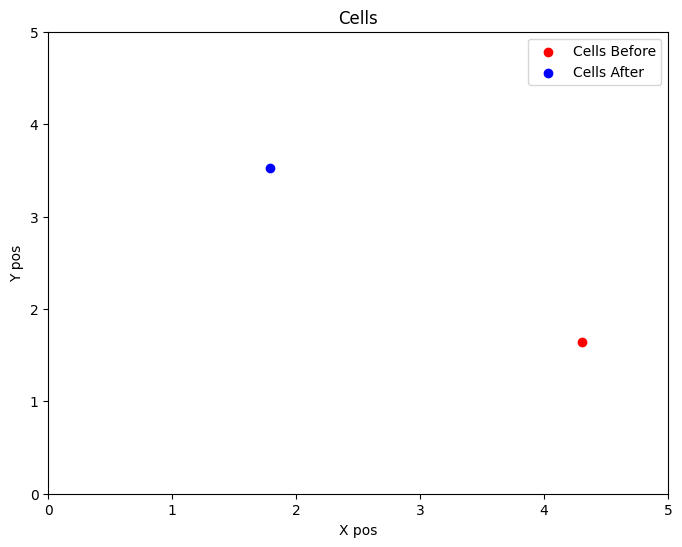

In [2]:
# Number of Cells 
size = 1
# Set A, size number of cells centered at 1,1
A = np.random.randn(size, 2) + np.array([2.5, 2.5])

B = np.random.randn(size, 2) + np.array([2.5, 2.5])
# Graph
plot.figure(figsize=(8, 6))
plot.scatter(A[:, 0], A[:, 1], c='red', label='Cells Before')
plot.scatter(B[:, 0], B[:, 1], c='blue', label='Cells After')
plot.xlabel('X pos')
plot.ylabel('Y pos')
plot.xlim(0, 5)
plot.ylim(0, 5)
plot.title('Cells')
plot.legend()

# Display the plot
plot.grid(False)
plot.show()

In [4]:
A

array([[4.30595164, 1.64628033]])

In [3]:
time_set = [A,B]


In [97]:
map_dim = 5
time_maps = []

for set in time_set:
        
    density_map = np.zeros((map_dim, map_dim))

    cell_coords = np.int64(set)
    current_cells = set
    n_cells = current_cells.shape[0]
    prop = np.ones(n_cells)  # just cell density

        
    # Populate the map with cell densities
    for idx in range(n_cells):
        density_map[cell_coords[idx, 1], cell_coords[idx, 0]] += prop[idx]

    sigma_pix = 1
    density_map = skimage.filters.gaussian(density_map, sigma=sigma_pix, truncate=1) 

    time_maps.append(density_map)


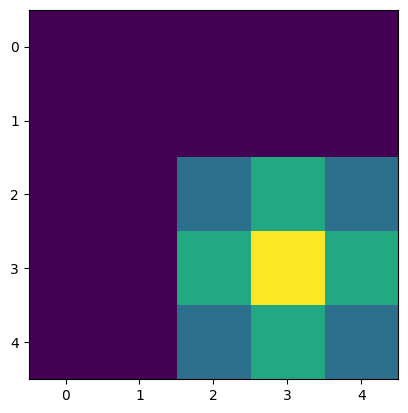

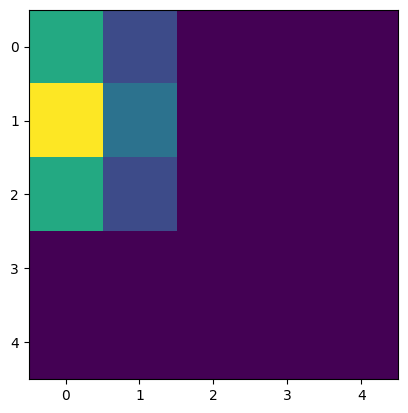

In [119]:
for map in time_maps:
    plot.figure()
    plot.imshow(map.T)

In [99]:

print(sum(sum(time_maps[0])))
print(sum(sum(time_maps[1])))

1.0000000000000002
1.0


In [102]:
points = []

for i in range(5):
    for j in range(5):
        points.append([i,j])

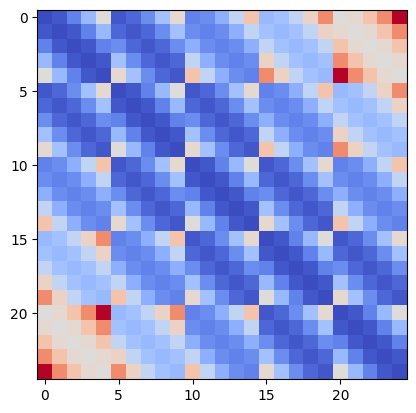

In [101]:
C = ot.dist(np.array(points), np.array(points))


im = plot.imshow(C, cmap="coolwarm")


In [104]:
A = np.array(time_maps[0]).flatten()
B = np.array(time_maps[1]).flatten()

In [105]:
# Compute Sinkhorn transport matrix from algorithm
reg = 0.005
K = np.exp(-C / C.max() / reg)
nit = 100
u = np.ones(len(A), )
for i in range(1, nit):
    v = B / np.dot(K.T, u)
    u = A / (np.dot(K, v))
ot_sink_algo = np.atleast_2d(u).T * (K * v.T)  # Equivalent to np.dot(np.diag(u), np.dot(K, np.diag(v)))

# Compute Sinkhorn transport matrix with POT
#ot_sinkhorn = ot.sinkhorn(time_maps[0], time_maps[1], reg=reg, M=C / C.max())

# # Difference between the 2
# print('Difference between algo and ot.sinkhorn = {0:.2g}'.format(np.sum(np.power(ot_sink_algo - ot_sinkhorn, 2))))

In [106]:
x = []
y = []

for i in range(5):
    for j in range(5):
        x.append(i)
        y.append(j)

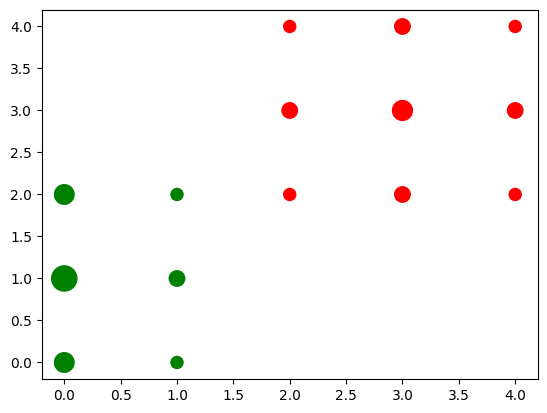

In [107]:
plot.scatter(x,y, s= time_maps[0] * 1000, color = 'r')
plot.scatter(x,y, s= time_maps[1] * 1000, color = "g")

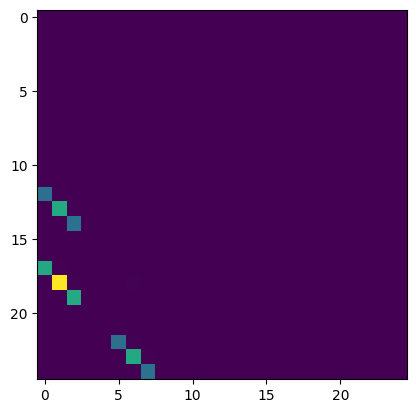

In [109]:
plot.imshow(ot_sink_algo)

In [113]:
print(np.shape(ot_sink_algo))

(25, 25)


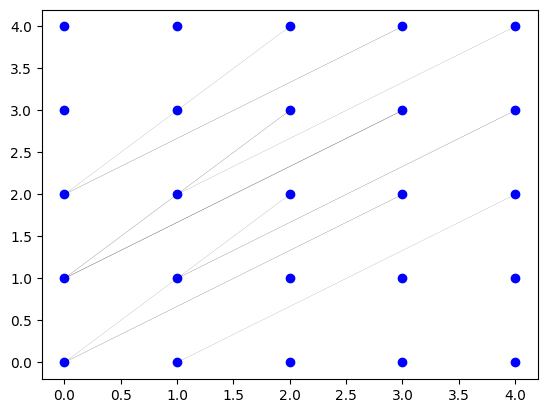

In [118]:
plot.figure()


for i in range((25)):
    for j in range(25):
        if (ot_sink_algo[i, j] > 0):
            plot.plot([points[i][0], points[j][0]], [points[i][1], points[j][1]],
                        '-k', lw=ot_sink_algo[i, j])


for i in range(len(points)):
    plot.scatter(points[i][0], points[i][1], color='b')



